# Data Science Salaries EDA 2023

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading the data

In [2]:
data = pd.read_csv('/kaggle/input/data-science-salaries-2023/ds_salaries.csv')

### Data cleaning and understanding the data

In [3]:
data.shape

(3755, 11)

In [4]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [6]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
data.duplicated().sum()

1171

In [8]:
data.drop_duplicates(keep = 'first', inplace= True)

In [9]:
data.duplicated().sum()

0

In [10]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,2584.000000,2.584000e+03,2584.000000,2584.000000
mean,2022.301084,2.103653e+05,133409.280186,50.483746
std,0.749179,8.080375e+05,67136.837329,48.163707
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,9.000000e+04,84975.000000,0.000000
50%,2022.000000,1.346300e+05,130000.000000,50.000000
75%,2023.000000,1.825625e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


# EDA and Visualization

### Top 10 job Tiles in 2023

<AxesSubplot: xlabel='job_title', ylabel='index'>

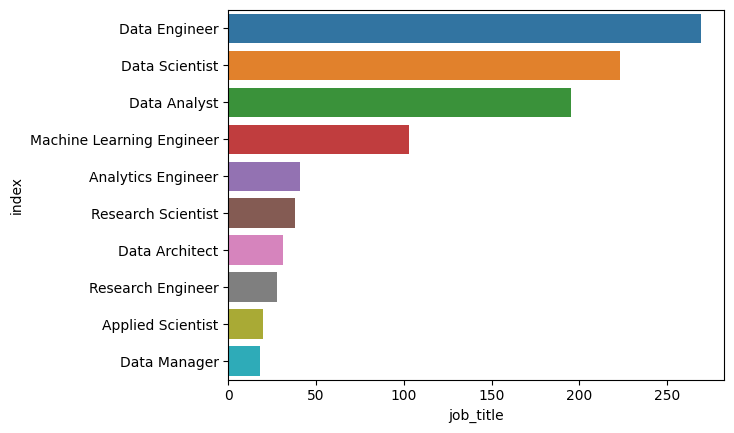

In [11]:
a = data[data['work_year']==2023]['job_title'].value_counts().nlargest(10).reset_index()
sns.barplot(data = a, x = 'job_title', y = 'index' )


### Top 10 average salaries by job title in 2023

[Text(0, 0.5, 'Job title'),
 Text(0.5, 0, 'Salary in USD'),
 Text(0.5, 1.0, 'Top 10 average salaries by job title')]

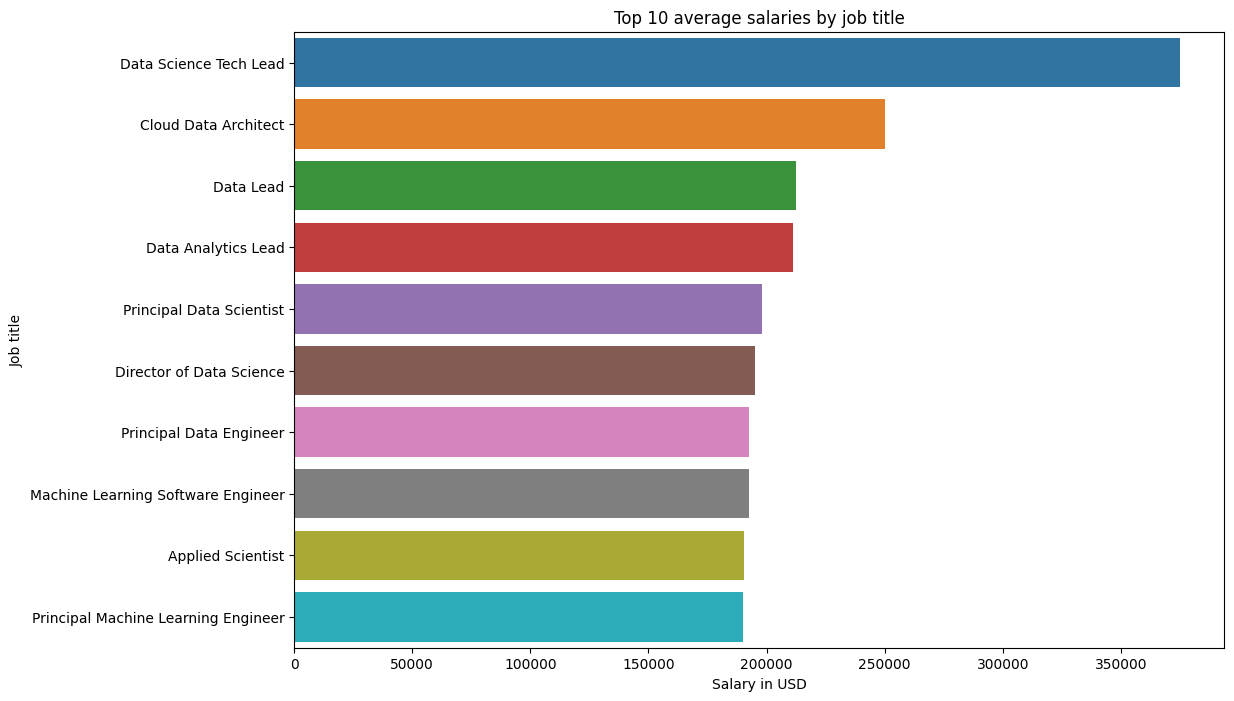

In [12]:
a = data['salary_in_usd'].groupby(data['job_title']).mean().round(0).nlargest(10).sort_values(ascending = False).reset_index()
plt.figure(figsize=(12,8))
ax = sns.barplot(data= a, y = 'job_title', x = 'salary_in_usd')
ax.set(ylabel='Job title', xlabel='Salary in USD', title = 'Top 10 average salaries by job title')

### Experience levels

In [13]:
data['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [14]:
data['experience_level']=data['experience_level'].replace('SE','Senior-level')
data['experience_level']=data['experience_level'].replace('MI','Medium_level')
data['experience_level']=data['experience_level'].replace('EN','Entry-level')
data['experience_level']=data['experience_level'].replace('EX','Executive-level')

[Text(0.5, 0, 'Experience Level'), Text(0.5, 1.0, 'Experience Levels')]

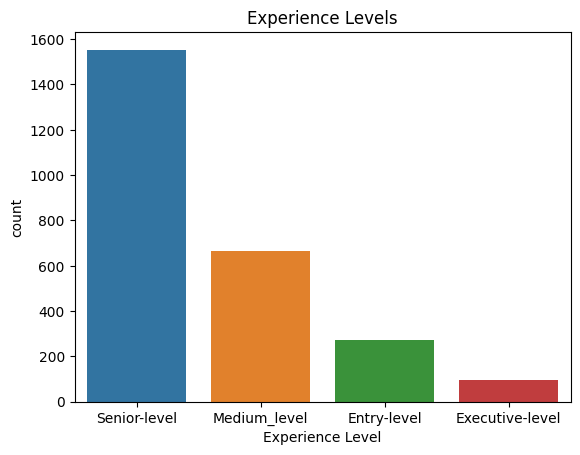

In [15]:

cx = sns.countplot( data=data, x = data.experience_level)
cx.set(xlabel='Experience Level', title = 'Experience Levels')

#### As you can see, the senior-level positions have the highest count, followed by mid-level and junior positions. There are fewer executive-level positions compared to other levels.

### Employment type

In [16]:
data['employment_type'].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [17]:
data['employment_type']=data['employment_type'].replace('FT','Full_time')
data['employment_type']=data['employment_type'].replace('CT','Contractual')
data['employment_type']=data['employment_type'].replace('PT','Part_time')
data['employment_type']=data['employment_type'].replace('FL','Freelance')

[Text(0, 0.5, 'counts'), Text(0.5, 1.0, 'Number of Employment types')]

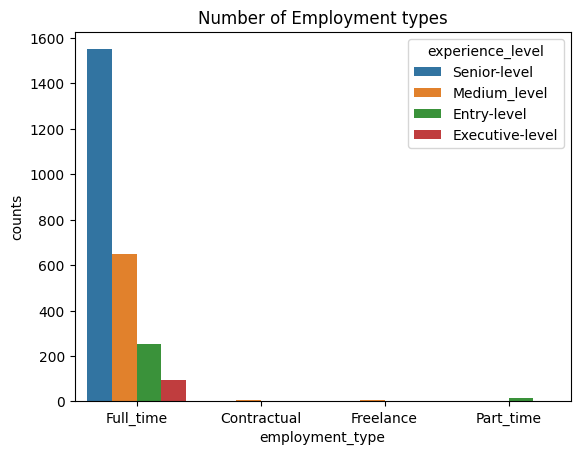

In [18]:

bx = sns.countplot(data=data, x = data.employment_type,  hue = 'experience_level')
bx.set(ylabel='counts', title= 'Number of Employment types')

### Salaries by employment types

[Text(0, 0, '147486'),
 Text(0, 0, '27750'),
 Text(0, 0, '50000'),
 Text(0, 0, '17779')]

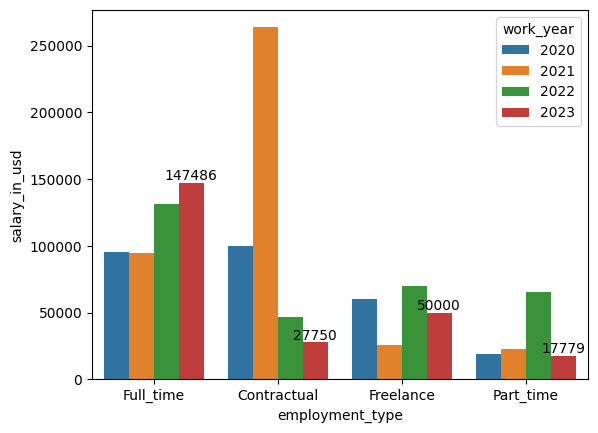

In [19]:
fig, ax = plt.subplots()
fx = sns.barplot(ax=ax, data = data, x = 'employment_type', y = 'salary_in_usd',errorbar = None,  hue = 'work_year' )
fx.bar_label(fx.containers[3])

 Here we can see average salaries for full time employees has increased over the years.

# Salaries by work experience

[Text(0.5, 0, 'Experience Level'),
 Text(0, 0.5, 'Average Salary'),
 Text(0.5, 1.0, 'Average salaries by Experience')]

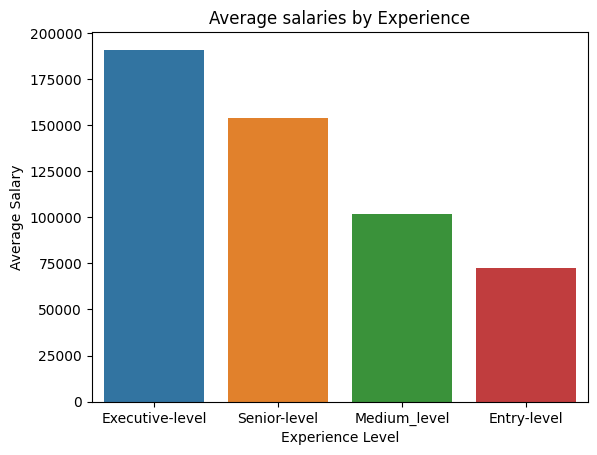

In [20]:
sw = data['salary_in_usd'].groupby(data['experience_level']).mean().round().sort_values(ascending=False).reset_index()

sx = sns.barplot(data = sw, x = 'experience_level', y = 'salary_in_usd')
sx.set(xlabel='Experience Level', ylabel='Average Salary', title = 'Average salaries by Experience')

Here we can see executive level has the highest average salaries followed by senior level.

## Salaries by work years

<AxesSubplot: title={'center': 'Average Salary by work year'}, xlabel='Work year', ylabel='Avg Salary'>

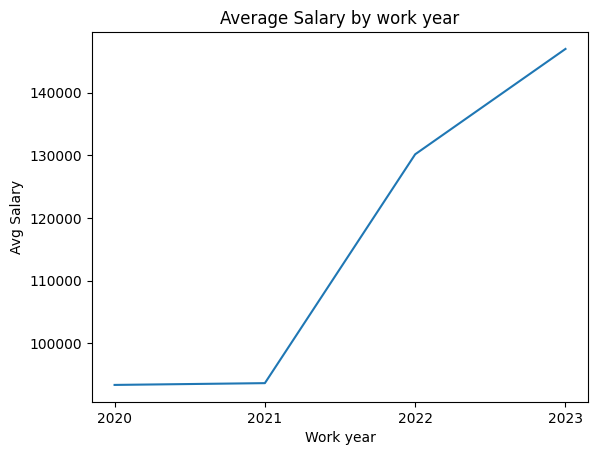

In [21]:
sy = data['salary_in_usd'].groupby(data['work_year']).mean()
plt.title('Average Salary by work year')
plt.xlabel('Work year')
plt.ylabel('Avg Salary')
sns.lineplot(x=['2020', '2021', '2022','2023'], y = sy)

Here we see that average salaries for data science has increased over the years.